# Desafio

## 1. Importe un csv desde internet
Utilice la base de datos de un compañero creada en la sesión pasada.


In [21]:
from ancilliary_funcs import *
import scipy.stats
df = pd.read_csv('subsample.csv')
df2 = pd.read_csv('subsample_gacsm_demo.csv')

lista_cabecera = ['cname','undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop','wef_imort','who_alc2000','who_tobt','wdi_exph']

## 2. Importe su conjunto de funciones
* Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.


In [98]:
for aux in lista_cabecera:
    pregunta3(df, aux)
    print('\n-------------------\n')

En cnameel numero de casos perdidos es 0
En cnameel porcentaje de casos perdidos es 0.0%

-------------------

En undp_hdiel numero de casos perdidos es 6
En undp_hdiel porcentaje de casos perdidos es 6.593406593406594%

-------------------

En ccodealpel numero de casos perdidos es 0
En ccodealpel porcentaje de casos perdidos es 0.0%

-------------------

En ht_regionel numero de casos perdidos es 0
En ht_regionel porcentaje de casos perdidos es 0.0%

-------------------

En gle_cgdpcel numero de casos perdidos es 2
En gle_cgdpcel porcentaje de casos perdidos es 2.1052631578947367%

-------------------

En imf_popel numero de casos perdidos es 28
En imf_popel porcentaje de casos perdidos es 40.57971014492754%

-------------------

En wef_imortel numero de casos perdidos es 27
En wef_imortel porcentaje de casos perdidos es 38.57142857142858%

-------------------

En who_alc2000el numero de casos perdidos es 7
En who_alc2000el porcentaje de casos perdidos es 7.777777777777778%

--------

## 3. Estime el puntaje Z
Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos


In [138]:
# 1. Creen columna con puntaje z
#wdi_exphel, gle_cgdpcel, undp_hdiel
def score_z(dataframe, var):
    dataframe['score_z'] = 0.0
    promedio = dataframe[var].dropna().mean()
    std = dataframe[var].dropna().std()
    dataframe = dataframe.sort_values(var)
    for aux in dataframe[var].dropna().index:
        dataframe.at[aux, 'score_z'] = (dataframe[var][aux]-promedio)/std
    return dataframe

def firs_and_last_ten(dataframe, var):
    new_df = score_z(dataframe, var)
    return new_df.head(10).append(new_df.tail(10))


firs_and_last_ten(df,'gle_cgdpc')

,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,score_z
45,52,El Salvador,0.678,SLV,Latam,332.26999,NaN,13.600000,2.52,NaN,6.772403,-0.744732
58,97,Liberia,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.200000,10.036333,-0.735136
28,125,Niger,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.725523
72,26,Burundi,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,-0.724352
53,54,Ethiopia (1993-),0.441,ETH,SubSaharian,900.77002,88.347000,46.500000,1.86,4.700000,4.884313,-0.709760
75,103,Malawi,0.473,MWI,SubSaharian,938.34998,17.604000,46.000000,1.23,16.299999,11.377956,-0.707449
0,139,Guinea-Bissau,0.421,GNB,SubSaharian,961.26001,NaN,NaN,3.57,NaN,5.593137,-0.706039
39,39,Comoros,0.498,COM,SubSaharian,972.35999,0.776000,NaN,0.12,15.300000,6.747643,-0.705356
29,70,Guinea,0.414,GIN,SubSaharian,993.83002,11.745000,65.199997,0.22,NaN,5.644798,-0.704036
91,72,Haiti,0.490,HTI,Latam,1024.93990,NaN,56.500000,5.68,11.800000,7.555654,-0.702122


## 4. Estime el puntaje z de las regiones
Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar
una opción al argumento statistic para calcular el puntaje z.


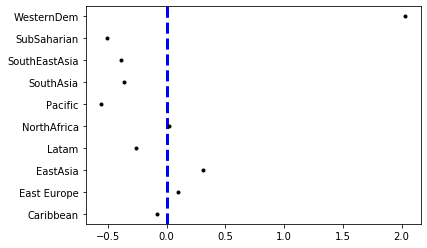

In [150]:
def dotplot(dataframe, plot_var, plot_by, global_stat = False, statistic = 'zscore'):    
    if statistic=='mean' :
        data = dataframe.groupby(plot_by)[plot_var].mean().dropna()
    elif statistic=='median' : 
        data = dataframe.groupby(plot_by)[plot_var].median().dropna()
    elif statistic == 'zscore':
        dataWithZ = score_z(dataframe, plot_var)
        data = dataWithZ.groupby(plot_by)['score_z'].mean().dropna()
        plt.axvline(dataWithZ['score_z'].dropna().mean(),lw = 3,color = 'blue',linestyle = '--')
        
    if global_stat and  statistic != 'zscore':
        plt.axvline(df[plot_var].dropna().mean(),lw = 3,color = 'blue',linestyle = '--')
    plt.plot(data.values, data.index, '.', color='black')
    plt.show()

dotplot(df, 'gle_cgdpc', 'ht_region', True)

## 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad
El método debe contener los siguientes argumentos:
- df1 : Tabla de datos 1.
- df2 : Tabla de datos 2.
- variable : Variable a contrastar.
- log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .


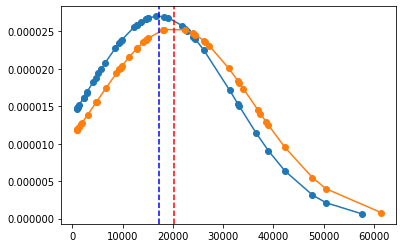

In [23]:
def plot_two_densities(df1, df2, variable, log=False):
    dataframe1 = df1.sort_values(variable).dropna()
    dataframe2 = df2.sort_values(variable).dropna()
    
    if log:
        data1 = np.log(dataframe1[variable])
        data2 = np.log(dataframe2[variable])
    else:
        data1 = dataframe1[variable]
        data2 = dataframe2[variable]
    
    mean1 = data1.mean()
    mean2 = data2.mean()
    
    std1 = data1.std()
    std2 = data2.std()
    
    fit1 = scipy.stats.norm.pdf(data1, mean1, std1)
    fit2 = scipy.stats.norm.pdf(data2, mean2, std2)
    
    plt.plot(data1, fit1, '-o', label ='df1')
    plt.plot(data2, fit2, '-o', label ='df2')
    plt.axvline(mean1, color = 'blue', linestyle = '--')
    plt.axvline(mean2, color = 'red', linestyle = '--')
    

    






    
plot_two_densities(df, df2, 'gle_cgdpc', log=False)